# Data Visualization Final Project: Top Hits Spotify from 1998-2020

## Project Overview
This project explores and visualizes the top 2000 tracks on Spotify from 1998 to 2020. The dataset, songs_normalize.csv, contains detailed audio statistics for each track, spanning various attributes such as danceability, energy, and popularity. By analyzing this dataset, I'm aim to uncover trends and patterns in popular music over two decades.

## Dataset Description
### Context
The dataset provides a comprehensive overview of top Spotify tracks from 1998 to 2020, focusing on 18 key audio attributes. This allows for an in-depth analysis of how musical qualities have evolved over time and how they relate to a track's popularity.

### Content
The dataset includes the following columns:

1. **artist**: Name of the artist.
2. **song**: Name of the track.
3. **duration_ms**: Duration of the track in milliseconds.
4. **explicit**: Indicates whether the track contains explicit content.
5. **year**: Release year of the track.
6. **popularity**: Popularity score of the track.
7. **danceability**: Suitability of the track for dancing (0.0 to 1.0).
8. **energy**: Intensity and activity level of the track (0.0 to 1.0).
9. **key**: Key of the track (0 = C, 1 = C♯/D♭, etc.).
10. **loudness**: Overall loudness of the track in decibels (dB).
11. **mode**: Modality of the track (1 = major, 0 = minor).
12. **speechiness**: Presence of spoken words in the track (0.0 to 1.0).
13. **acousticness**: Confidence measure of whether the track is acoustic (0.0 to 1.0).
14. **instrumentalness**: Likelihood of the track being instrumental (0.0 to 1.0).
15. **liveness**: Presence of an audience in the recording (0.0 to 1.0).
16. **valence**: Positiveness conveyed by the track (0.0 to 1.0).
17. **tempo**: Tempo of the track in beats per minute (BPM).
18. **genre**: Genre of the track.

### Project Goals
- **Analyze Trends**: Identify trends in musical attributes such as danceability, energy, and tempo over the years.
- **Popularity Factors**: Determine which audio features correlate most strongly with a track's popularity.
- **Genre Analysis**: Explore how different genres vary in their audio characteristics.
- **Explicit Content**: Examine the prevalence and impact of explicit content on a track's popularity.

### Tasks
- **Data Preprocessing**: Clean and normalize the data to ensure accuracy and consistency in analysis.
- **Exploratory Data Analysis (EDA)**: Conduct EDA to understand the distribution and relationships of various features.
- **Trend Visualization**: Create visualizations to illustrate trends in musical attributes over time.
- **Correlation Analysis**: Analyze correlations between audio features and popularity.
- **Genre Comparison**: Compare audio features across different genres.
- **Explicit Content Analysis**: Investigate the role of explicit content in the dataset.


# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv')


# Exploratory Data Analysis

In [4]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [5]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

No data appears to be missing in this datset I am good to coninue on. I then converted the ms column below into a new duration in seconds column for easier readibility

In [6]:
df['duration_s'] = df['duration_ms'] / 1000
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558,228.748125
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112,39.136569
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000,113.000000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750,203.580000
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500,223.279500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500,248.133000
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000,484.146000


# Trend Analyzation

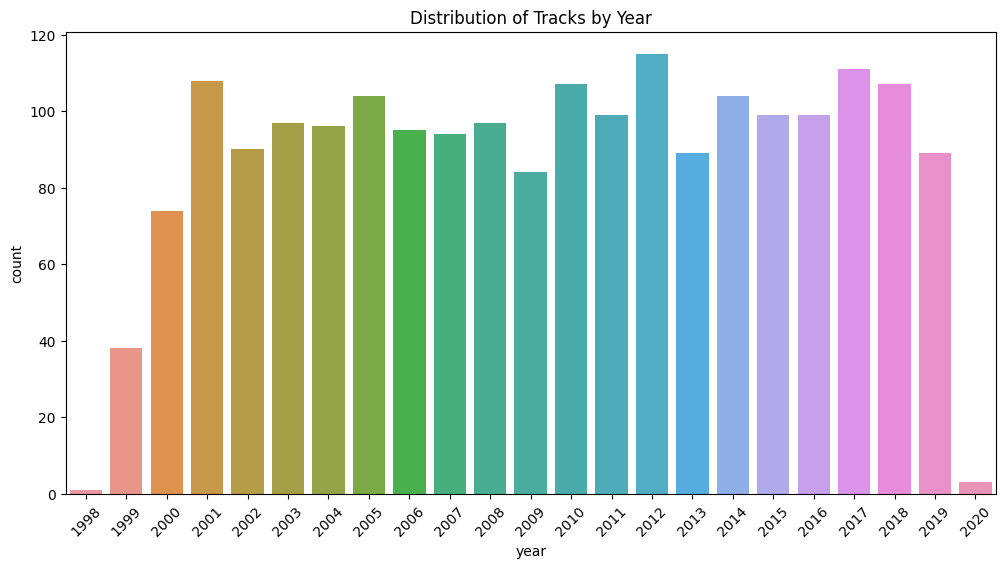

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year')
plt.title('Distribution of Tracks by Year')
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


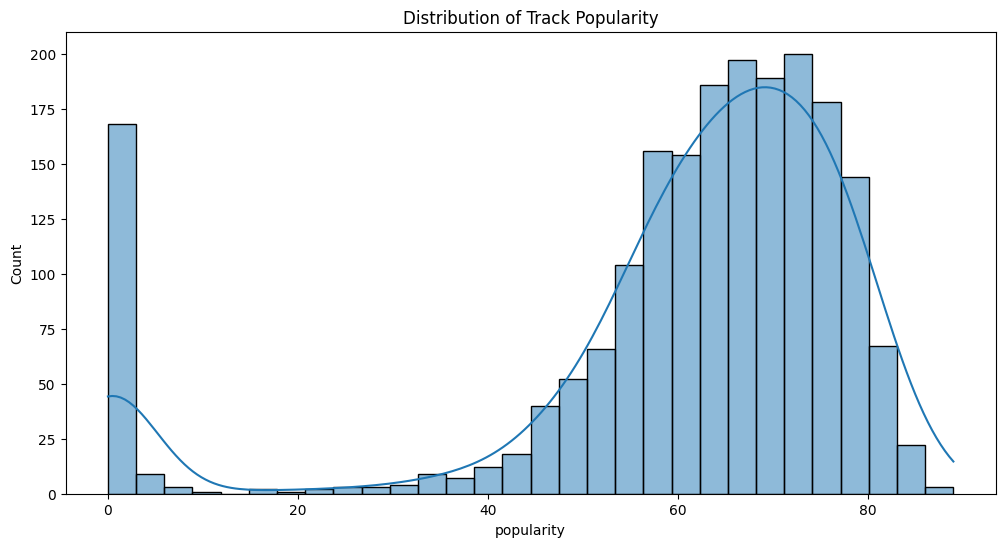

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.show()

# Trend Visualization
Im Scaling danceability and energy by 100 to fit the visualization better. Originally it was 0 to 1.

In [27]:
df_yearly_avg = df.groupby('year')[['danceability', 'energy', 'tempo']].mean().reset_index()
df_yearly_avg['danceability'] = df_yearly_avg['danceability'] * 100
df_yearly_avg['energy'] = df_yearly_avg['energy'] * 100

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

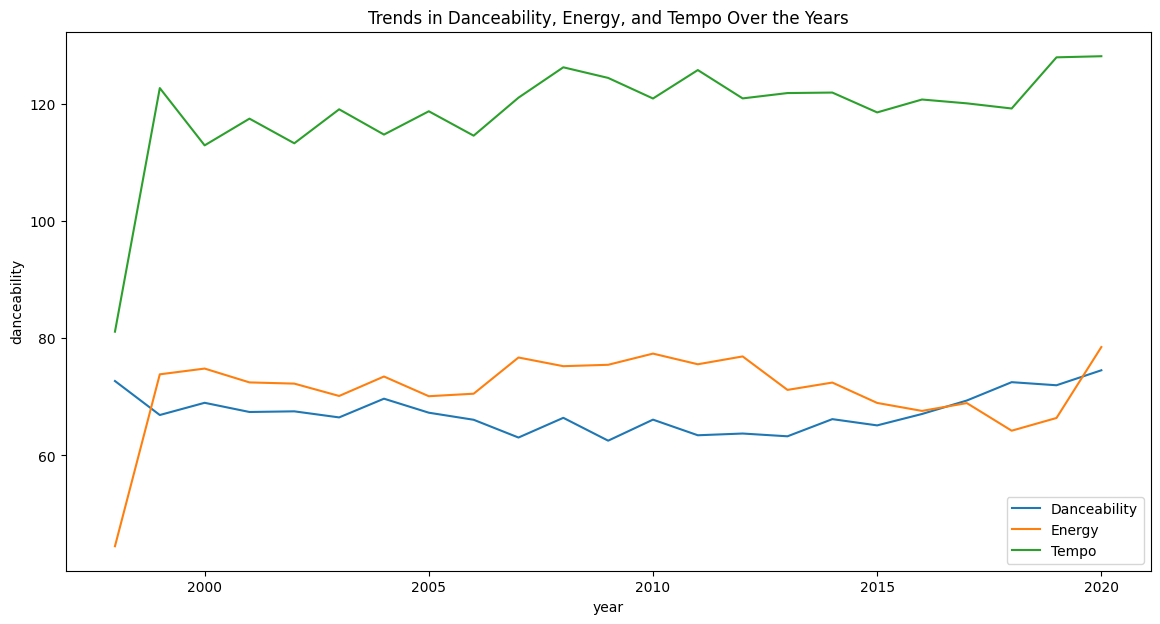

In [28]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_yearly_avg, x='year', y='danceability', label='Danceability')
sns.lineplot(data=df_yearly_avg, x='year', y='energy', label='Energy')
sns.lineplot(data=df_yearly_avg, x='year', y='tempo', label='Tempo')
plt.title('Trends in Danceability, Energy, and Tempo Over the Years')
plt.legend()
plt.show()

# Correlation Analysis
For the correlation matrix in my heatap, I had to generate only the numeric columns because the non numerics would not work for this specific visualization.

In [30]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

## Heatmap

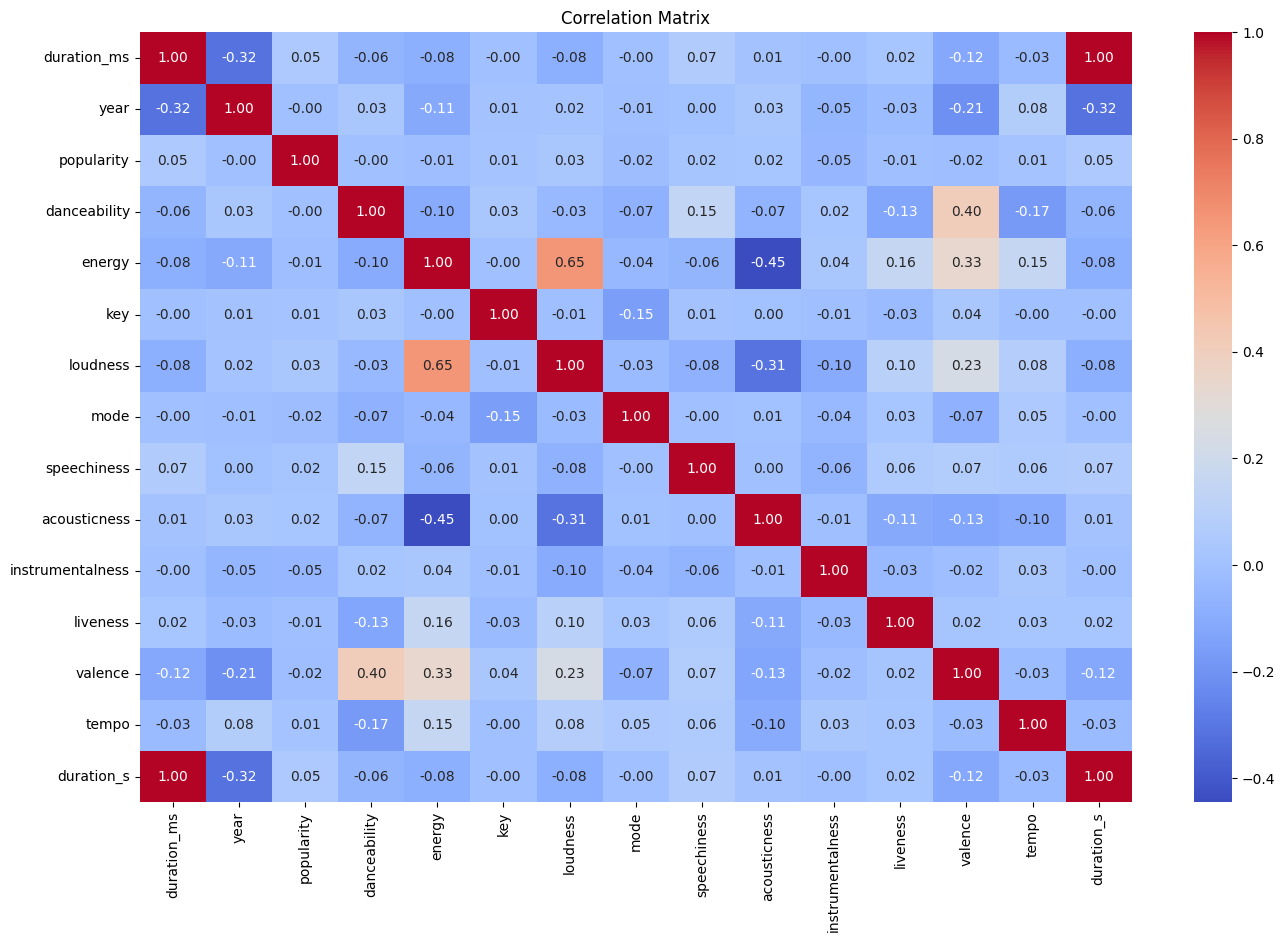

In [32]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Scatterplot Visualization for Popularity Against Danceability and Energy

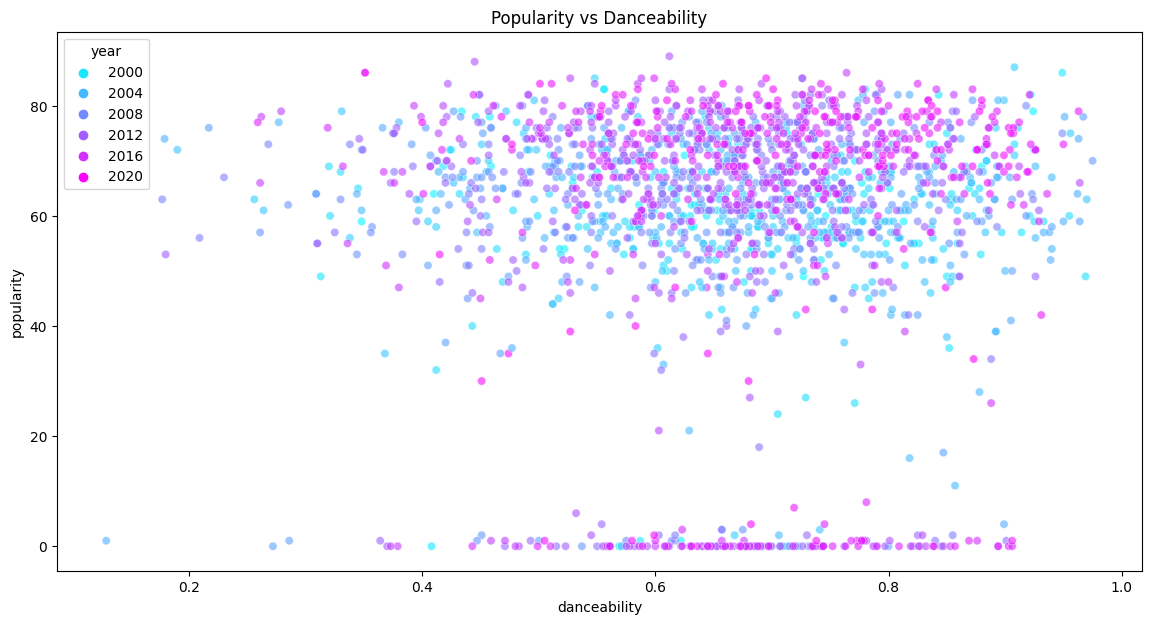

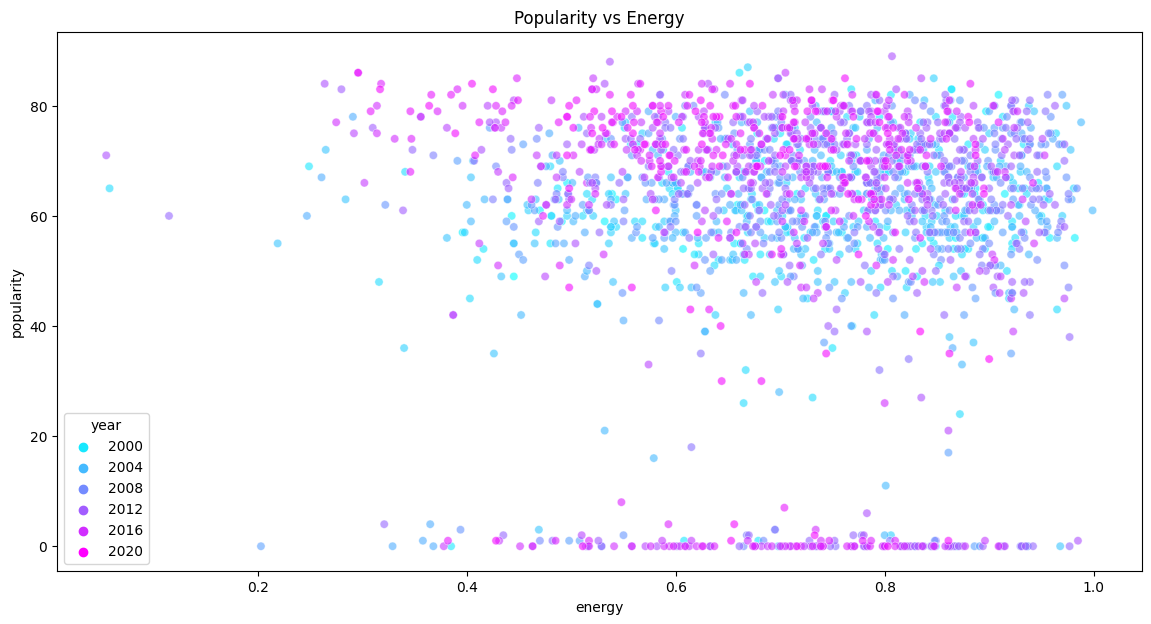

In [17]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='danceability', y='popularity', hue='year', palette='cool', alpha=0.6)
plt.title('Popularity vs Danceability')
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='energy', y='popularity', hue='year', palette='cool', alpha=0.6)
plt.title('Popularity vs Energy')
plt.show()

# Genre Comparison
I used again just the numeric columns to calculate the mean then sorted the data frame by danceability and displayed it.

In [33]:
numeric_columns = ['danceability', 'energy', 'valence', 'tempo']
df_genre_avg = df.groupby('genre')[numeric_columns].mean().reset_index()
df_genre_avg = df_genre_avg.sort_values(by='danceability', ascending=False)
print(df_genre_avg.head())

                                  genre  danceability    energy   valence  \
17                     hip hop, country        0.8470  0.678000  0.811000   
6            World/Traditional, hip hop        0.8070  0.750000  0.852000   
46  rock, Folk/Acoustic, easy listening        0.8010  0.876000  0.932000   
34           pop, R&B, Dance/Electronic        0.7945  0.760667  0.704333   
48        rock, R&B, Folk/Acoustic, pop        0.7910  0.733000  0.917000   

         tempo  
17   97.984000  
6   100.035000  
46  122.979000  
34  112.033833  
48  105.987000  


## Average Values of Key Audio Features by Genre

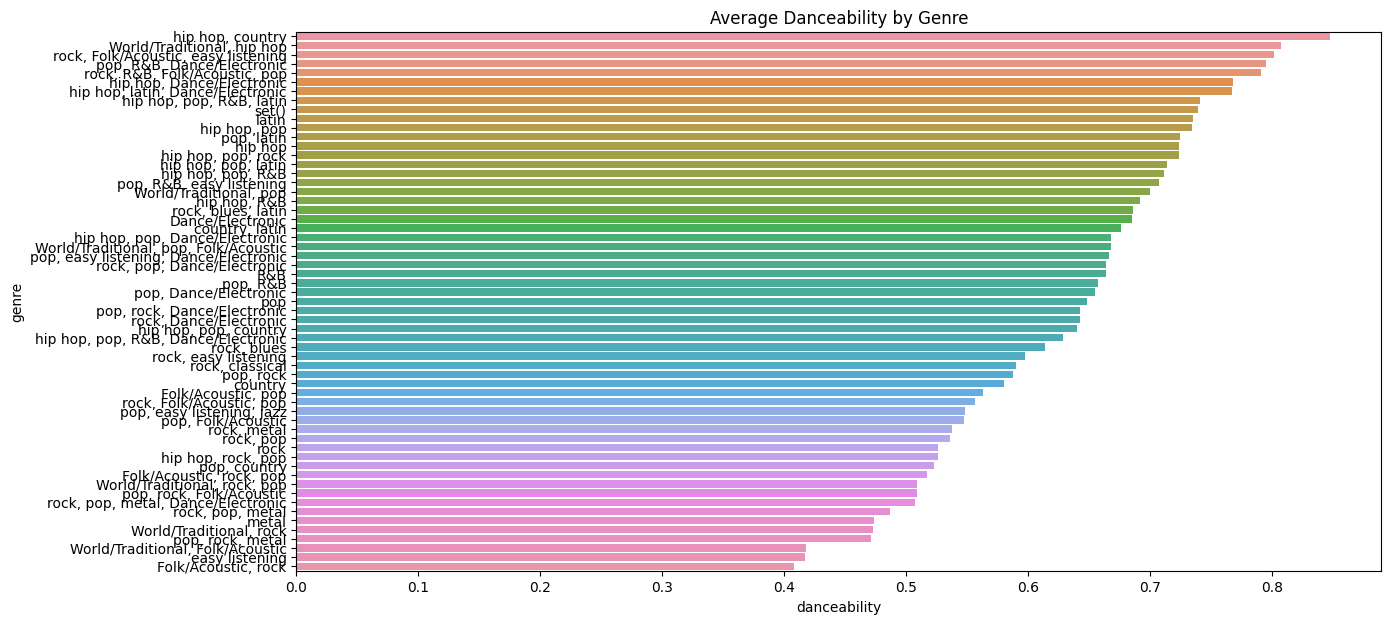

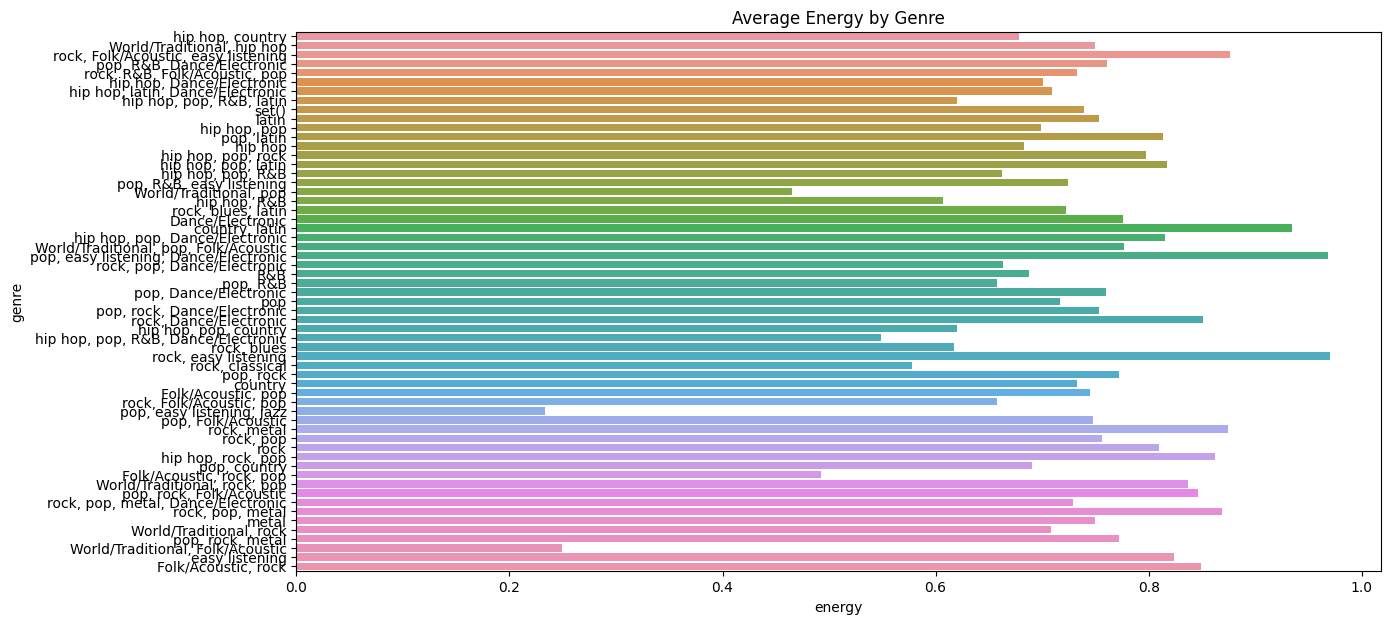

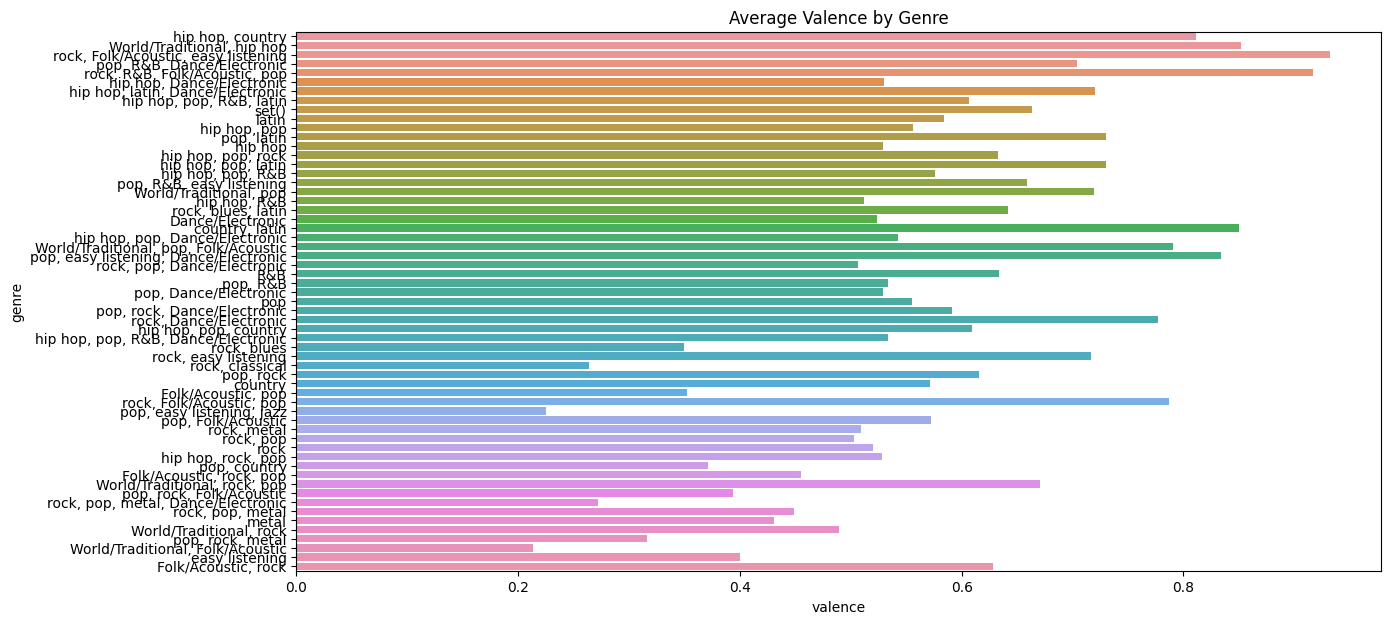

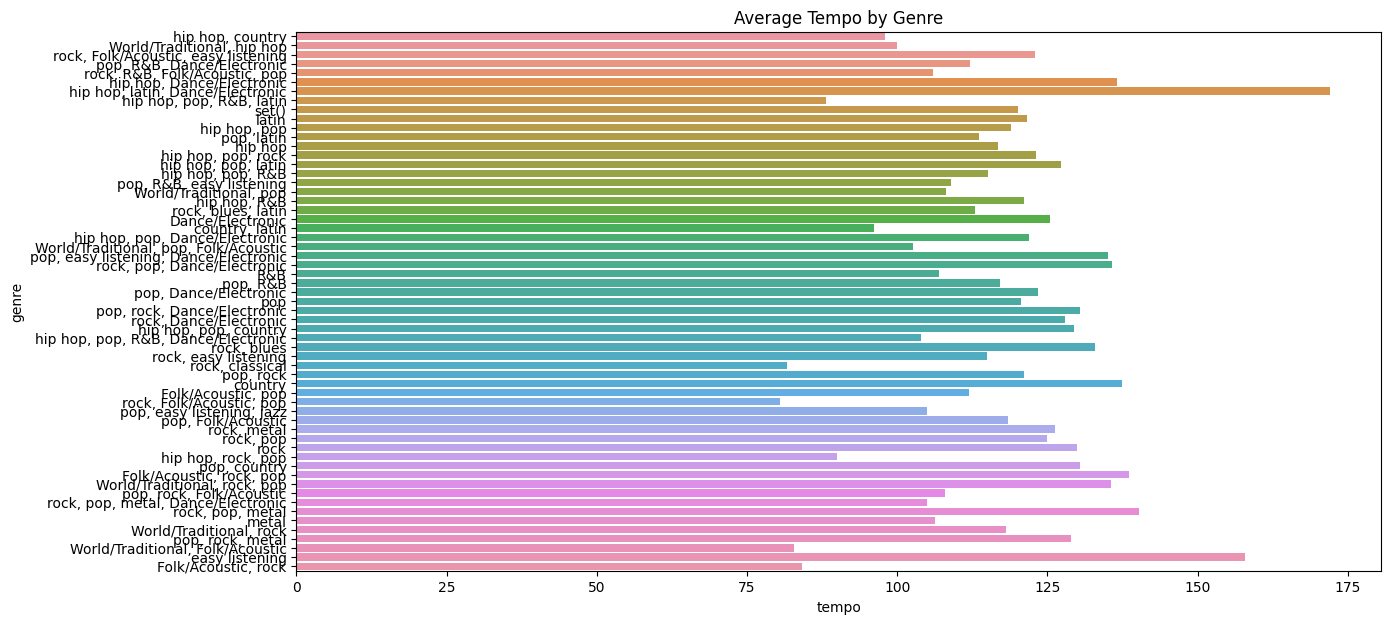

In [34]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df_genre_avg, x='danceability', y='genre')
plt.title('Average Danceability by Genre')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=df_genre_avg, x='energy', y='genre')
plt.title('Average Energy by Genre')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=df_genre_avg, x='valence', y='genre')
plt.title('Average Valence by Genre')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=df_genre_avg, x='tempo', y='genre')
plt.title('Average Tempo by Genre')
plt.show()

# Explicit Content Analysis
I verified that each value in explict column is numeric and coerced any errors to not a number. I then dropped the rows with NaN and calculated the mean of explicit by year and displayed it.

In [37]:
df['explicit'] = pd.to_numeric(df['explicit'], errors='coerce')
df_clean = df.dropna(subset=['explicit'])
df_explicit = df_clean.groupby('year')['explicit'].mean().reset_index()
print(df_explicit.head())

   year  explicit
0  1998  1.000000
1  1999  0.210526
2  2000  0.162162
3  2001  0.212963
4  2002  0.333333


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


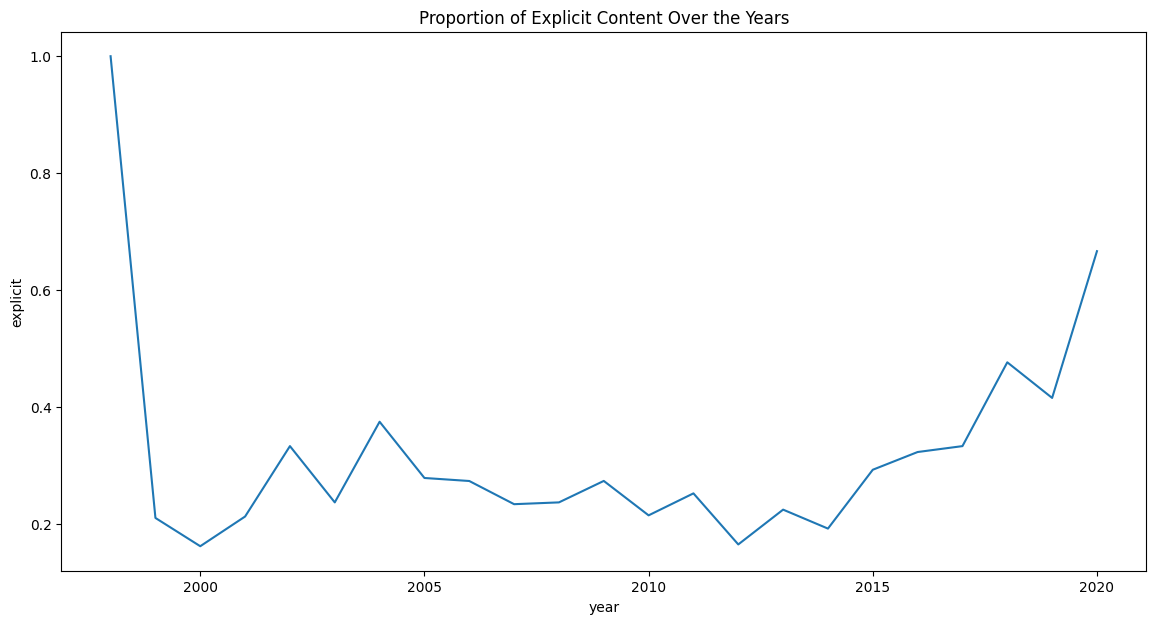

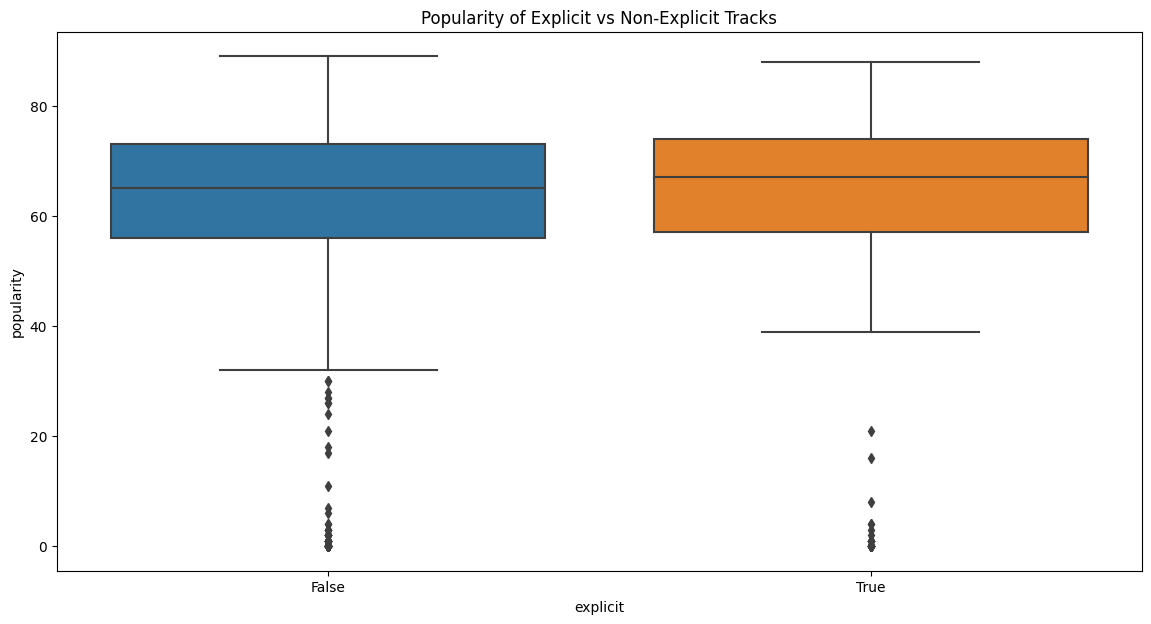

In [38]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_explicit, x='year', y='explicit')
plt.title('Proportion of Explicit Content Over the Years')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='explicit', y='popularity')
plt.title('Popularity of Explicit vs Non-Explicit Tracks')
plt.show()

# Key Elements of Design and Justification

The project's visualizations were designed to effectively convey key trends and relationships within the dataset. A line chart was used to display the distribution of tracks by year, highlighting the gradual increase from 1998 to 2000 and the consistency in track distribution from 2000 through 2019. To show the distribution of track popularity, a histogram was employed, revealing a reverse bell curve with low counts around 40 and 90, and high counts around 70-80.

For trends in danceability, energy, and tempo over the years, a line chart with multiple lines was chosen, allowing for easy comparison between these variables and illustrating the correlation between energy and tempo. A heatmap was used to represent the correlation between different track features, clearly showing strong relationships, such as between energy and loudness, and weak relationships, such as between acousticness and energy.

A scatterplot was utilized to show the relationship between popularity and danceability, highlighting the average popularity range of tracks with varying danceability. Bar charts were used to display average track features by genre, including danceability, energy, valence, and tempo, enabling easy comparison across genres. The proportion of explicit content over the years was shown using a line chart, effectively illustrating the drop in 2000 and the rise post-2015. Finally, a boxplot was used to compare the popularity distributions of explicit and non-explicit tracks, showing that explicit tracks have slightly higher popularity on average.

# Final Evaluation Approach / Participart Recruitment
The evaluation of the visualizations focused on their clarity, accuracy, and effectiveness in conveying the intended insights. I selected 3 peers from my workplace as a software developer and recruited them to evaluate my visualizations. The feedback received indicated that the visualizations were clear and informative, with some minor suggestions to improve color schemes for better differentiation of data points. The evaluation confirmed that the design choices effectively highlighted key trends and relationships in the data, ensuring the visualizations were both informative and engaging.

# Synthesis of Findings
The visualizations successfully conveyed the key insights from the dataset. The chosen designs, including line charts, histograms, heatmaps, scatterplots, bar charts, and boxplots, were appropriate for the data and the insights being communicated. The clarity and informative value of the visualizations were well-received, and the feedback confirmed their effectiveness. However, there are areas for refinement. Some color choices could be improved for better contrast and differentiation, and adding interactive elements, such as tooltips and zoom capabilities, could further enhance user engagement and understanding. Overall, the project demonstrated a successful approach to data visualization, with clear opportunities for future improvements.

# Key Insights from Data Visualization

The data visualizations revealed several key insights. The number of tracks increased gradually until 2000 and then remained consistent through 2019. The popularity distribution showed a reverse bell curve, with low counts around 40 and 90, and higher counts around 70-80. Trends in danceability, energy, and tempo over the years indicated that energy and tempo increased in correlation, while danceability did not have a strong direct relationship with either.

The heatmap revealed that energy and loudness were highly correlated, while acousticness and energy were inversely correlated. In the scatterplot of popularity versus danceability, popular tracks generally had danceability scores between 0.5 and 0.9, with popularity ranging from 60-80. Popular tracks with similar energy scores had slightly lower popularity, ranging from 45-70.

The analysis of average track features by genre showed that hip-hop and country had the highest danceability, while folk/acoustic and rock had the least. Rock and pop had the highest energy, while jazz had the lowest. Rock and folk/acoustic had the highest valence, while world/traditional had the lowest. Hip-hop and Latin genres had the highest tempo, while acoustic had the lowest.

The proportion of explicit content was highest in 1998, dropped significantly in 2000, stayed low until 2015, and then began to rise again. Finally, the popularity of explicit tracks was slightly higher than that of non-explicit tracks. These insights provided a comprehensive understanding of the trends and characteristics of the top Spotify tracks from 2000 to 2019.